<h1> Simple EDA project for data analysis, data engineering </h1>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt

warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

<h2> Download data </h2>


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d ihelon/coffee-sales # dataset from - https://www.kaggle.com/datasets/ihelon/coffee-sales/data

Dataset URL: https://www.kaggle.com/datasets/ihelon/coffee-sales
License(s): CC0-1.0
  0% 0.00/15.1k [00:00<?, ?B/s]
100% 15.1k/15.1k [00:00<00:00, 7.24MB/s]


In [ ]:
!unzip coffee-sales.zip -d /content


Archive:  coffee-sales.zip
  inflating: /content/index.csv      


In [ ]:
df = pd.read_csv('index.csv')

In [ ]:
df.head(4)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano


In [ ]:
df.shape

(1313, 6)

In [ ]:
# check if nan values in dataframe

df.isnull().any()

,0
date,False
datetime,False
cash_type,False
card,True
money,False
coffee_name,False


In [ ]:
# number of missing values ​​by card id

df['card'].isna().sum()

89

In [ ]:
# number of values ​​where the form of payment in cash is indicated

df['cash_type'][df['cash_type'] != 'card'].count()

89

In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
df.describe()

,money
count,1224.000000
mean,32.223513
std,5.168802
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,38.700000


In [ ]:
columns = df.columns.tolist()
del columns[4] # without money column
for column in columns:
  print(f'{column.upper()} - ', df[f'{column}'].unique())
  print('-=-=-' * 8)


DATE -  ['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '2024-03-11' '2024-03-12' '2024-03-13' '2024-03-14' '2024-03-15'
 '2024-03-16' '2024-03-17' '2024-03-18' '2024-03-19' '2024-03-20'
 '2024-03-21' '2024-03-22' '2024-03-23' '2024-03-24' '2024-03-25'
 '2024-03-26' '2024-03-27' '2024-03-28' '2024-03-29' '2024-03-30'
 '2024-03-31' '2024-04-01' '2024-04-02' '2024-04-03' '2024-04-04'
 '2024-04-05' '2024-04-06' '2024-04-07' '2024-04-08' '2024-04-09'
 '2024-04-10' '2024-04-11' '2024-04-12' '2024-04-13' '2024-04-14'
 '2024-04-15' '2024-04-16' '2024-04-17' '2024-04-18' '2024-04-19'
 '2024-04-20' '2024-04-21' '2024-04-22' '2024-04-23' '2024-04-24'
 '2024-04-25' '2024-04-26' '2024-04-27' '2024-04-28' '2024-04-29'
 '2024-04-30' '2024-05-02' '2024-05-03' '2024-05-06' '2024-05-07'
 '2024-05-08' '2024-05-09' '2024-05-10' '2024-05-11' '2024-05-12'
 '2024-05-13' '2024-05-14' '2024-05-15' '2024-05-16' '2024-05-17'
 '

In [ ]:
for column in ['coffee_name', 'cash_type']:
  print('-=-=' * 8)
  print(df[f'{column}'].value_counts())

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
coffee_name
Americano with Milk    304
Latte                  257
Cappuccino             207
Americano              171
Cortado                118
Hot Chocolate           73
Espresso                54
Cocoa                   40
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
cash_type
card    1224
Name: count, dtype: int64


In [ ]:
# transform card_id to simple id
def card_transform(x):
    if pd.notna(x) and isinstance(x, str):
        return str(int(''.join(x[5:].split('-'))))
    return x


df['card'] = df['card'].apply(card_transform)
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,1,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,2,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,2,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,3,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,4,38.70,Latte
...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,277,23.02,Cortado
1309,2024-08-17,2024-08-17 16:33:48.977,card,192,32.82,Latte
1310,2024-08-17,2024-08-17 18:48:58.852,card,456,32.82,Cappuccino
1311,2024-08-17,2024-08-17 21:18:56.806,card,40,27.92,Americano with Milk


In [ ]:
# add new feature

def weekday_transform(x):
  days_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'}
  return days_of_week[x]



df['weekday'] = pd.to_datetime(df['date']).dt.weekday
df['weekday'] = df['weekday'].apply(weekday_transform)
df['weekday'].value_counts()

,count
weekday,
Tuesday,193
Thursday,190
Wednesday,178
Saturday,177
Friday,169
Monday,160
Sunday,157


<h2> Number of transactions (purchases) - distribution by days </h2>

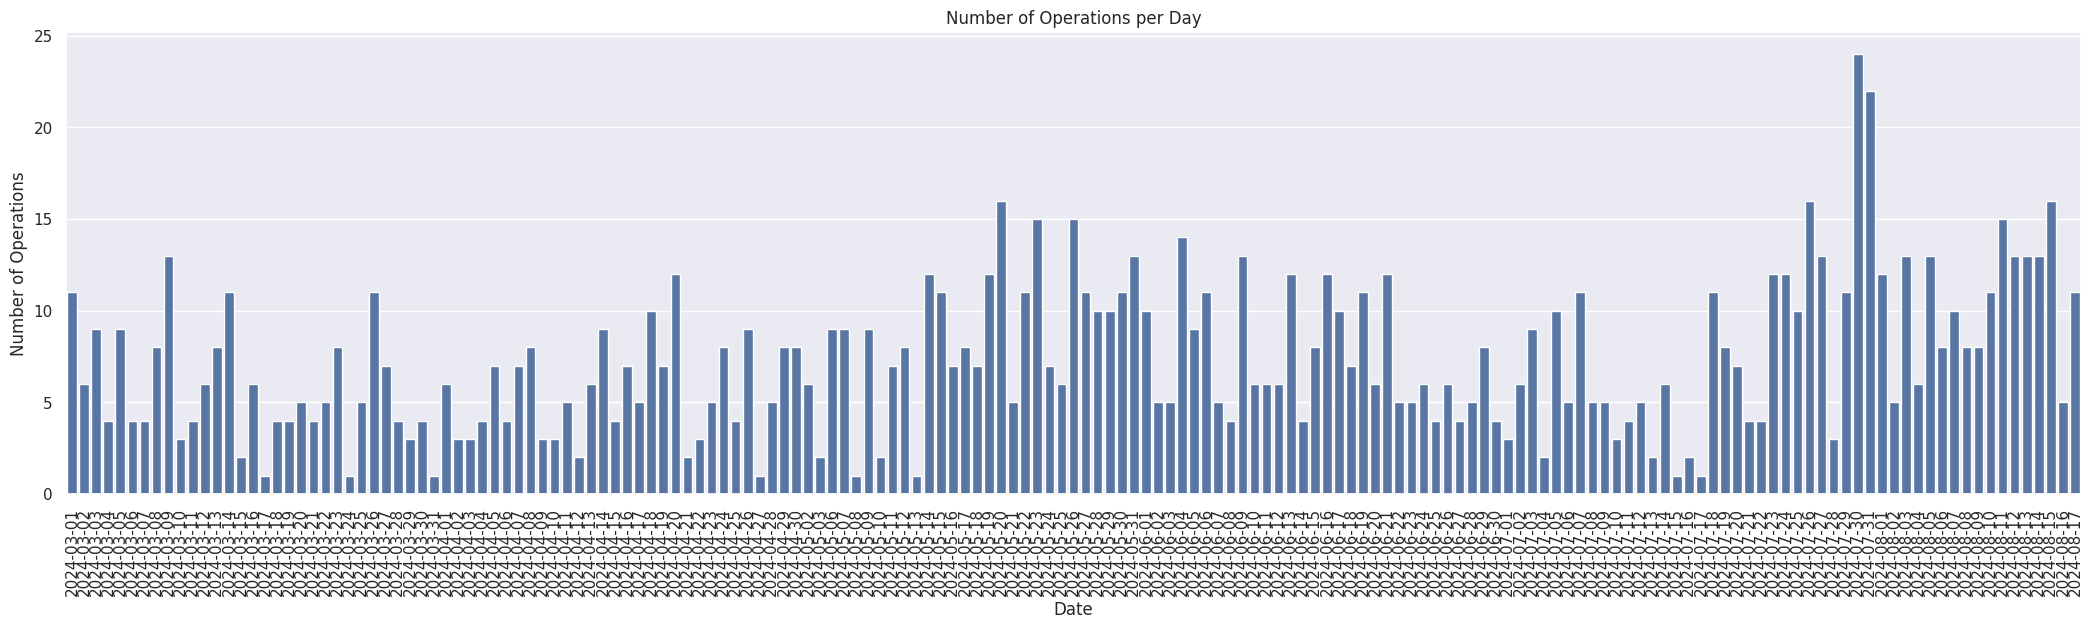

In [ ]:
df['date'] = pd.to_datetime(df['date'])

operation_counts = df.groupby('date').size().reset_index(name='count')

plt.figure(figsize=(26, 6))
sns.barplot(data=operation_counts, x='date', y='count')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Operations')
plt.title('Number of Operations per Day')
plt.show()

<h2> Number of transactions - distribution by type of payment </h2>

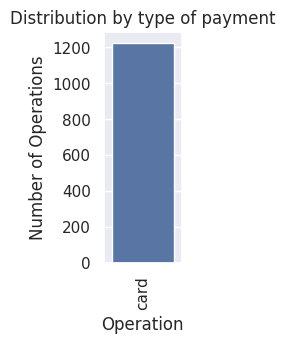

In [ ]:
operation_type = df.groupby('cash_type').size().reset_index(name='count')
operation_type

plt.figure(figsize=(1, 3))
sns.barplot(data=operation_type, x='cash_type', y='count')
plt.xticks(rotation=90)
plt.xlabel('Operation')
plt.ylabel('Number of Operations')
plt.title('Distribution by type of payment')
plt.show()

<h2> Visualization of coffee purchases by days of the week / months / type of coffee </h2>

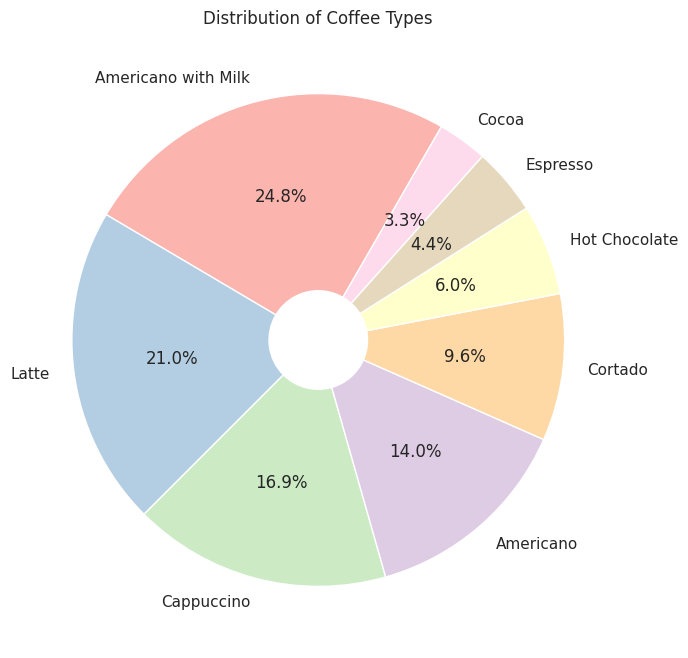

In [ ]:
coffee_counts = df['coffee_name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(coffee_counts,
        labels=coffee_counts.index,
        autopct='%1.1f%%',
        startangle=60,
        colors=sns.color_palette("Pastel1"),
        wedgeprops={'width': 0.8})
plt.title('Distribution of Coffee Types')
plt.show()

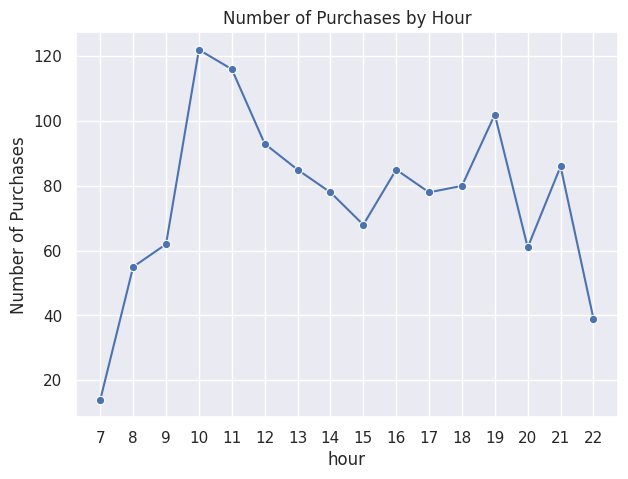

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])


df['hour'] = df['datetime'].dt.hour

hourly_purchases = df.groupby('hour').size().reset_index(name='purchases')

plt.figure(figsize=(7, 5))
sns.lineplot(x='hour', y='purchases', data=hourly_purchases, marker='o')
plt.xticks(hourly_purchases['hour'])
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Hour')
plt.show()

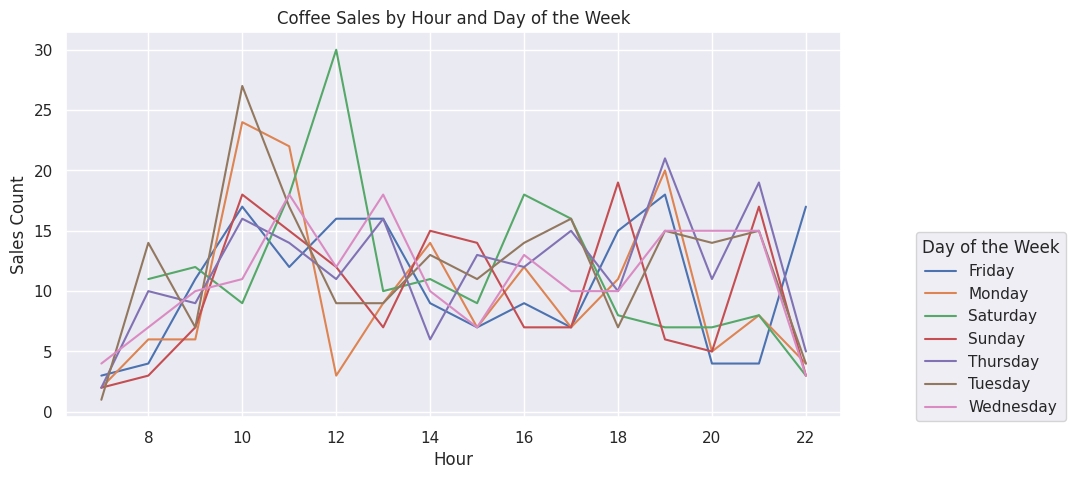

In [ ]:
daily_hourly_summary = df.groupby(['weekday', 'hour']) \
    .agg({'money': ['count']}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'count'),
             hue='weekday')
plt.xlabel('Hour')
plt.ylabel('Sales Count')
plt.title('Coffee Sales by Hour and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.3, 0.5));

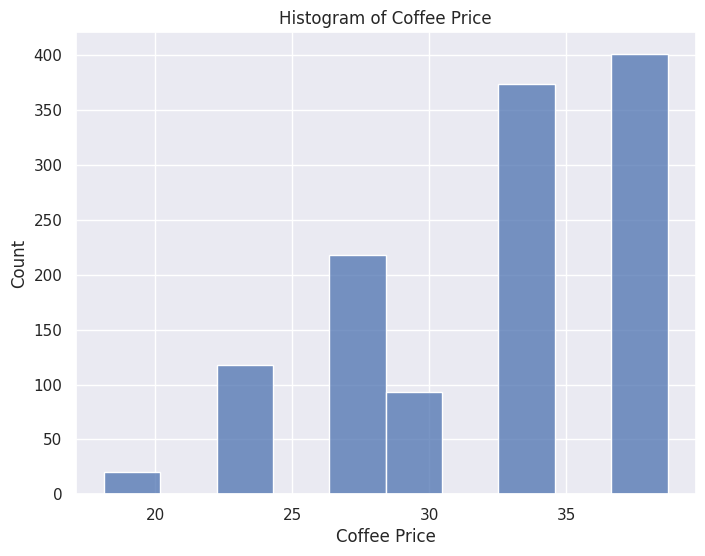

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['money'], bins=10, binwidth=2)

plt.xlabel('Coffee Price')
plt.ylabel('Count')
plt.title('Histogram of Coffee Price')
plt.show()